# Машинное обучение на матфаке, 2019/2020 уч. год.

## Домашнее задание 1 -- numpy, pandas, matplotlib.

В этом домашнем задании вам предстоит закрепить навыки работы с важнейшими для data science библиотеками -- numpy, pandas и matplotlib.

Правила оценивания на вики-странице. Часть заданий необходимо сдать в [Яндекс.контест](https://contest.yandex.ru/contest/16930/problems/)

In [ ]:
import numpy as np

### Part 1. numpy

Задания 1-10 оцениваются в 0.4 баллов.

__Задание 1__. Создайте несколько одномерных массивов размера $10^n$ для n от 1 до 6. из случайных чисел при помощи модуля `np.random`. Заполните их независимыми случайными величинами из нормального распределения с матожиданием 5 и дисперсией 10. 

In [ ]:
arr = [np.random.normal(5, 10, size=10**(i+1)) for i in range(0,6)]
# print(arr[5])

В заданиях 2-10 запрещается использование циклов `for` и `while` в сдаваемом вами коде. 

__Задание 2__. Сгенерируйте случайный вектор (одномерный массив) из нормального распределения со средним в нуле и произвольной дисперсией. С помощью `np.where` замените в созданном массиве все отрицательные элементы на нули.

In [ ]:
vec = np.random.normal(0, 1, 100)
# print(vec)
# print(np.where(vec < 0, 0, vec)) # -- все отрицательные превращает в 0
# print(np.where(vec >= 0, vec, 0)) # -- все что больше положительного оставляет на месте, остальное подефолту нуль
# первое кажется более логичным, хотя выполняет тоже самое (?)
np.where(vec < 0, 0, vec)

__Задание 3__. Дан массив 10х3, который будет использован как массив с цветами RGB (каждый канал обозначается целым числом от 0 до 255), однако вследствие порчи данных при передаче значения массива вышли за границы заданного диапазона. Напишите функцию clip_values, которая вышедшие за границу диапазона значения превращает в ближашие границы диапазона.

__Хинт__: воспользуйтесь np.clip

In [ ]:
def clip_values(image: np.ndarray) -> np.ndarray:
    return np.clip(image, 0, 255)

# [[r, g, b], [r, g, b]...]
damaged = np.random.normal(127, 255, 30).reshape((10,3))
print(damaged)
fixed = clip_values(damaged)
print(fixed)

__Задание 4__. Сгенерируйте случайный вектор из нормального распределения со средним в нуле и произвольной дисперсией. С помощью `np.insert` в встаьте в него на четные индексы нули.

In [ ]:
vec = np.random.normal(0, 1, 100)
# print(vec)
new_vec2 = np.insert(vec, range(0, 100, 2), 0) # Вектор, которому на четные места вставили нули
new_vec2 = np.insert(vec, range(100), 0) # Вектор, у которого на четных местах нули
# PS: вместо range(0, 100, 2) можно использовать np.arange(0, 100, 2). (Что лучше?)
# print(new_vec)

__Задание 5__. Создайте случайный масиив 4х4 из нормального распределения со средним в нуле и произвольной дисперсией и верните индексы положительных элементов (`np.argwhere`)

In [ ]:
matr = np.random.normal(0, 1, 16).reshape((4,4))
print(matr)
np.argwhere(matr > 0)

__Задание 6__. Создайте матрицу случайных целых чисел от в интервале от 1 до 10 размера 5х5 и посчитайте следующее (сабмодуль `np.linalg`):

- определитель матрицы
- обратную матрицу
- произведение матрицы на саму себя
- собственные вектора



In [ ]:
matr = np.random.randint(1, 11, 25).reshape((5,5))
print( 'matrix: \n{} \n\n determinant {} \n '
      'inverse \n {} \n\n'
      'square: \n{}\n\n'
       'eigenvectors: {}'.format(matr, np.linalg.det(matr),
            np.linalg.inv(matr),
            matr.dot(matr),
            np.linalg.eig(matr)) )

Задания 7-10 необходимо сдать в [Яндекс.контест](https://contest.yandex.ru/contest/16930/problems/) и прикрепить ссылку на решение в формате `https://contest.yandex.ru/contest/xxxxx/run-report/xxxxx/`. Сдавайте задания строго в соответствии с написанной сигнатурой и возвращаемыми типами. Для сдачи необходимо отправить в соответствующую задачу файл, содержащий функции и необходимые импорты. Обратите внимание, что вам доступен только `numpy`. При сдаче выберите компилятор make. __При отсутствии ссылки на решение задание засчитано не будет!__

__Задание 7__. Напишите функцию, которая находит сумму квадратов положительных элементов одномерного массива.

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621657/

In [ ]:
def get_squares(a: np.ndarray) -> float:
    return np.sum(np.square(np.where(a < 0, 0, a)))

assert get_squares(np.array([1,-2,3])) == 10

# a = np.array([1, -2, 3])
# print(np.sum(np.square(np.where(a < 0, 0, a))))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621657/`

__Задание 8__. Коля -- мастер покера и умеет выигрывать только целые суммы денег от 0 до n - 1. Коля решил сыграть на турнире. На вход подаётся массив `p` размера $n$, где `p[i]` -- вероятность, что Коля выиграет на турнире $i$ рублей ($\sum_{i=1}^{n}p_i =1$, $p_i \geqslant 0, \forall i$). Посчитайте математическое ожидание выигрыша Коли на турнире.


__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621663/

In [ ]:
def expected_reward(p: np.ndarray) -> float:
    return p.dot(np.array(range(len(p))))

assert expected_reward(np.array([0.4, 0.5, 0.1])) == 0.7

# p = np.array([0.4, 0.5, 0.1])
# print(p.dot(np.array(range(len(p)))))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621663/`

__Задание 9__. Дана квадратная матрица `A`. Посчитайте произведение диагональных элементов матрицы, __строго__ превосходящих среднее значение элементов всей матрицы.

__Хинт__: взять диагональ матрицы -- np.diag(), произведение элементов массива -- np.prod(), среднее значение в массиве -- np.mean().

__Ссылка на посылку в контесте__: https://contest.yandex.ru/contest/16930/run-report/30621668/

In [ ]:
def prod_upper_avg_diagonal(a: np.ndarray) -> float:
    diag = np.diag(a)
    return np.prod(np.where(diag > np.mean(a), diag, 1))

assert prod_upper_avg_diagonal(np.array([[ 0,  1,  2,  3],
                                         [ 4,  5,  6,  7],
                                         [ 8,  9, 10, 11],
                                         [12, 13, 14, 15]])) == 150

# a = np.array([[ 0,  1,  2,  3],
#              [ 4,  5,  6,  7],
#              [ 8,  9, 10, 11],
#              [12, 13, 14, 15]])
# diag = np.diag(a)
# mean = np.mean(a)
# print(diag)
# print(mean)
# print(np.prod(np.where(diag > mean, diag, 1)))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621668/`

__Задание 10__. Дано число $n$. Создайте матрицу $A$ размера $n \times n$ такую, что $A[i][j] = i \cdot j$. Нумерация строк и столбцов начинается с нуля.

__Ссылка на посылку в контесте:__ https://contest.yandex.ru/contest/16930/run-report/30621681/

In [ ]:
def create_ij(n: int) -> np.ndarray:
    a = np.array(range(n)).reshape(1, -1)
    return a.T.dot(a)

assert np.all(create_ij(5) == np.array([[ 0,  0,  0,  0,  0],
                                        [ 0,  1,  2,  3,  4],
                                        [ 0,  2,  4,  6,  8],
                                        [ 0,  3,  6,  9, 12],
                                        [ 0,  4,  8, 12, 16]]))

# print(create_ij(5))

# **LINK** `https://contest.yandex.ru/contest/16930/run-report/30621681/`

### Part 2. Numpy vs pure python


__Задание 11__. (1 балл) Выберите любые 5 функций из заданий 2-10 и имплементируйте их, но без использования сторонних библиотек (считайте, что вам доступны только стандартные библиотеки языка Питон и на вход вместо массивов подаются питоновские списки).

In [ ]:
import random

#1 Task 1
def normal_distr(n):
    return [random.gauss(0, 1) for _ in range(n)]
    
def without_negatives(arr):
    return [max(x, 0) for x in arr]

#2 Task 5
def create_gauss_sq_matrix(n):
    return [[random.gauss(0, 1) for _ in range(n)] for _ in range(n)]

def where_positive(matr):
    ans = []
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] > 0:
                ans.append([i, j])
    return ans
# m = create_gauss_sq_matrix(4)
# print(m)
# print(where_positive(m))

#3 Task 7 сумму квадратов положительных элементов одномерного массива.
def py_get_squares(arr):
    return sum([a*a for a in arr if a > 0])
# print(py_get_squares([1,-2,3]))

#4 Task 8
def py_expected_reward(prob_arr):
    ans = 0
    for p in range(len(prob_arr)):
        ans += p*prob_arr[p]
    return ans
# print(py_expected_reward([0.4, 0.5, 0.1]))

#5 Task 10
def py_create_ij(n: int):
    arr = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i*j)
        arr.append(row)
    return arr
# print(py_create_ij(5))

__Задание 12__. (3 балла) Сравните время работы векторизованных функций с обычными. Для этого постройте графики зависимости времени исполнения функции от размера входного массива. Перебирайте значения от 1 до $10^6$ по логарифмической шкале. Сделайте выводы.

__Графики должны быть опрятными!__. Подписывайте оси, и единицы измерения, указывайте легенду и название графика. Оценка за задание с неопрятными графиками может быть снижена! Сравнение плохого и хорошего графиков:

In [14]:
import sys
import timeit # https://stackoverflow.com/questions/8220801/how-to-use-timeit-module/29512249
import matplotlib.pyplot as plt # для графико
plt.ioff()

import numpy as np

# def compared_plot(legend=''):
#     pass

def timings_and_plot(pure_py_func, np_func, args_func, title="Simple Plot", 
                     number=5, low=1, high=6, base=10, samples=13):
    '''
        pure_py_func -- функция чистого питона, без NP
        np_func -- функция NP
        args_func -- лямбда функция, которая генерирует входные данные для pure_py_func и np_func
                        по сути, функнция-генератор // generation function of input
        title -- легенда(название) нашего графика (подПИСЬКА сверху) // забавно, что legend, т.е. легенда графика у matplot это совсем НЕ легенда, а название это легенда [fun facts at 6am]
        number -- timeit.timeit(... -->number= <-- ) вот этот номер, " method with number executions"
                    "сколько раз выполняется функция" // https://docs.python.org/3/library/timeit.html
        low -- нижнее значение степени base
        high -- верхнее значение степени base
        base -- "база" логарифма
        samples -- сколько точек 
    '''
    logspace = np.logspace(low, high, num=samples, base=base) # log space of dots (basicly axis X)
    pure_time = [] # timings of Py
    numpy_time = [] # timings of NumPy
    
    for s in logspace:
        args = args_func(int(s))
        pure_time.append(timeit.timeit(lambda: pure_py_func(*args), number=number) / number)
        numpy_time.append(timeit.timeit(lambda: np_func(*args), number=number) / number)
#         print(s)
#         print(logspace)
#         print(pure_time)
#         print(numpy_time)
#         print('\n')

    
    normal = plt.gca()
    normal.set_title(title)
    normal.set_ylabel('time')
    normal.set_xlabel('size of input')
    normal.plot(logspace, pure_time, label='Pure Python', marker='o')
    normal.plot(logspace, numpy_time, label='NumPy', marker='o')
    plt.legend()
    plt.show()
    
#     ToDo: https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python
#             Надо подумать как правильно тут логарифм шкалу сделать! 
    logsized = plt.gca()
    logsized.set_title('Log scale')
    logsized.set_ylabel('time')
    logsized.set_xlabel('size of input')
#     logsized.set_yscale('log')
    logsized.set_xscale('log')
    logsized.plot(logspace, pure_time, label='Pure Python', marker='o')
    logsized.plot(logspace, numpy_time, label='NumPy', marker='o')
    plt.show()    
        

__Хинт__: воспользуйтесь библиотекой `time` или мэджиком `%timeit`.

__Замечание__: Далее будет производиться сравнение быстроты работы функций с использыванием `timings_and_plot(...)`.
Для удобства функции будут продублированы, они будут в точности повторять написанные функции в заданиях 2-10.
Функции, начинающиеся с `np_` -- это функции, которые написаны с использыванием NumPy, а функции, которые начинаются с `pp_` -- это функции чистого питона, он же PurePython.

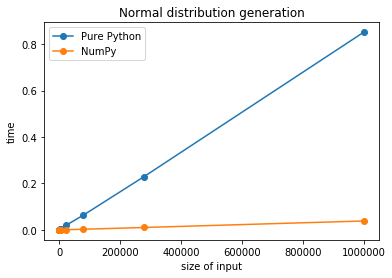

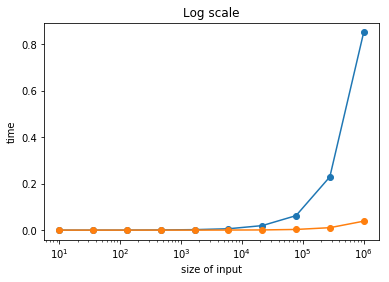

In [17]:
#             PurePy vs NumPy
# Task 0: _Нормальное распределение_
# Первым(нулевым) шагом хочется выяснить с помощью чего генерировать случайные числа быстрее

import random

def np_normal_gaus(n):
    return np.random.normal(0, 1, n)

def pp_normal_gaus(n):
    return [random.gauss(0, 1) for _ in range(n)]

timings_and_plot(pp_normal_gaus, np_normal_gaus, lambda n: (n,), title="Normal distribution generation")

_Вывод 0_: Случаные распределения быстрее генерирует NumPy, в дальнейшем будем его и использовать для данной задачи.

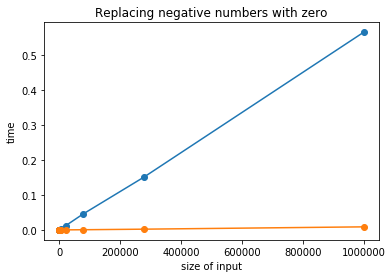

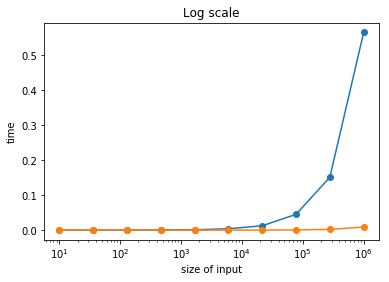

In [5]:
#             PurePy vs NumPy
# Task 1: _Удаление отрицательных чисел из распределение_
# Постановка: на вход подается массив, необходимо вместо отрицательных чисел написать нули.

def np_wo_negative(vec):
    return np.where(vec < 0, 0, vec)

def pp_wo_negative(vec):
    return [max(x, 0) for x in vec]

timings_and_plot(pp_wo_negative, np_wo_negative, lambda n: (np.random.normal(0, 1, n),),
                 title="Replacing negative numbers with zero")

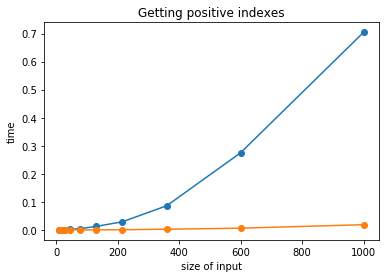

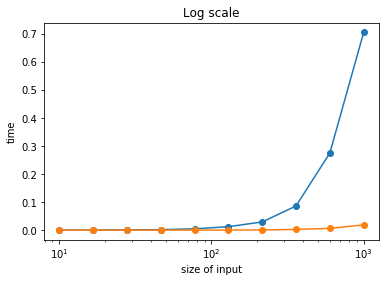

In [6]:
#             PurePy vs NumPy
# Task 2: _Удаление отрицательных чисел из распределение_
# Постановка: на вход подается массив, необходимо вместо отрицательных чисел написать нули.

def np_positive_indexes(matr):
    return np.argwhere(matr > 0)

def pp_positive_indexes(matr):
    ans = []
    for i in range(len(matr)):
        for j in range(len(matr)):
            if matr[i][j] > 0:
                ans.append([i, j])
    return ans

timings_and_plot(pp_positive_indexes, np_positive_indexes, 
                 lambda n: (np.random.normal(0, 1, n*n).reshape((n,n)),),
                 title="Getting positive indexes", high=3, s)
# O(n^2) => (10^3)^2

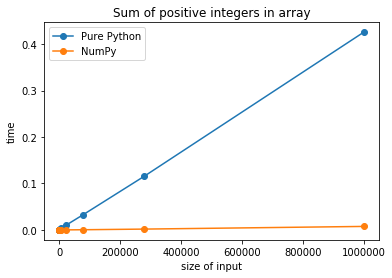

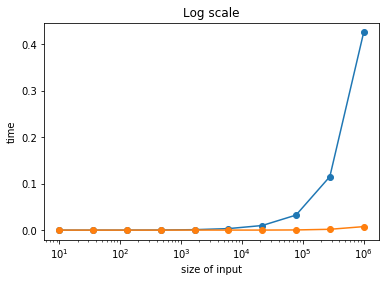

In [16]:
#             PurePy vs NumPy
# Task 3: _Сумма квадратов положительных элементов_
# Постановка: на вход подается массив, необходимо взять сумму квадратов всех его положительных элементов.

def np_positive_sum(arr):
    return np.sum(np.square(np.where(arr < 0, 0, arr)))

def pp_positive_sum(arr):
    return sum([a*a for a in arr if a > 0])


timings_and_plot(pp_positive_sum, np_positive_sum, 
                 lambda n: (np.random.randint(0, 10**3, n), ),
                 title="Sum of positive integers in array")

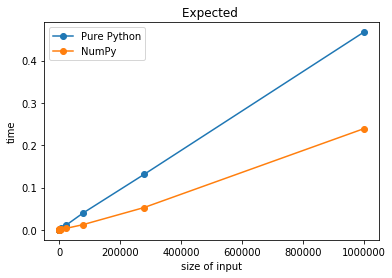

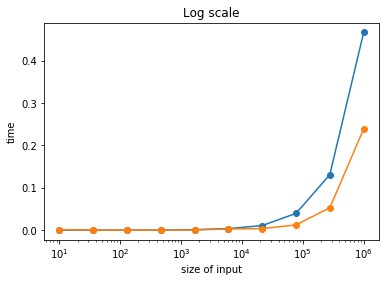

In [18]:
#             PurePy vs NumPy
# Task 4: _Математическое ожидание_
# Постановка: на вход подается массив вероятностей, необходимо взять сумму его элементов умноженных на индекс, т.е. мат.ожидание.

def np_expected_reward(prob_arr):
    return prob_arr.dot(np.array(range(len(prob_arr))))

def pp_expected_reward(prob_arr):
    ans = 0
    for p in range(len(prob_arr)):
        ans += p*prob_arr[p]
    return ans

timings_and_plot(pp_expected_reward, np_expected_reward, 
                 lambda n: (np.random.normal(0, 1, n), ), # тут мог быть бы более умный генератор, который проверял бы что сумма всех вероятностей единица и прочее,
                                                          # но нас интересует время работы от длины входа, поэтому можем использовать вот такую глупую" версию
                 title="Expected ")

In [20]:
#             PurePy vs NumPy
# Task 4: _Создание ij-матрицы_
# Постановка: на вход число, необходимо создать матрицу M n*n такую, что M_ij = i*j

def np_create_ij(n):
    a = np.array(range(n)).reshape(1, -1)
    return a.T.dot(a)

def pp_create_ij(n):
    arr = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(i*j)
        arr.append(row)
    return arr

timings_and_plot(pp_create_ij, np_create_ij, 
                 lambda n: (n, ),
                 title="Creating ij matrix", high=3)

TypeError: object of type 'int' has no len()

__Вывод__:

### Part 3. Pandas.

Задания 13-22 оцениваются в 0.4 баллов.  В заданиях 13-22 запрещается пользоваться циклами `for` и `while` в сдаваемом вами коде. Задания 13-15 также сдаются в контест с компилятором python3.6+numpy+pandas. В конце сдаваемого вами файла должны быть строки
```
import sys
exec(sys.stdin.read())
```

In [ ]:
import pandas as pd

__Задание 13__, Дан датафрейм, в котором существует колонка 'email' (строка, длиной не более 255). Напишите функцию, которая в заданном датафрейме заменяет все невалидные email'ы на "unknown@unknown.com". Валидным сичтается емэйл, выглядящий как `[name]@[subdomain].[domain]`, где `[name]` -- строка, содержащая латинский буквы, точки и знаки `-` и `_`, `[subdomain]` и `[domain]` -- строки, содержащие только латинские буквы и цифры. Длина строки `[domain]` -- не больше 8 символов.

__Хинт__. Вопспользуйтесь методом .apply(), в который передайте функцию для обрабоки одного email'a.


__Ссылка на посылку в контесте:__

In [ ]:
def reset_emails(df: pd.DataFrame) -> pd.DataFrame:
    # remark: надо использовать регулярные выражения
    ### YOUR CODE
    pass

import sys
exec(sys.stdin.read())

__Задание 14__. Дан датафрейм, в котором существуют колонки 'age' (возраст в годах, целое число) и 'income' (дробное число). Напишите функцию, которая вернёт средний заработок людей младше 18 лет.

__Ссылка на посылку в контесте:__

In [ ]:
def get_mean_income(df: pd.DataFrame) -> float:
    ### YOUR CODE
    pass

__Задание 15__. Дан датафрейм, в котором существуют колонки 'id' (идентификатор пользователя, целое положительное число), 'age' (возвраст в годах, целое число), 'sex' (пол пользователя, строка, равная либо "Male", либо "Female", либо "Other"), "favorite_color" (любимый цвет пользователя, строка длиной не более 255). Найдите число различных любимых цветов у женщин младше 18 лет.

__Ссылка на посылку в контесте__:

In [ ]:
def get_fav_colosr(df: pd.DataFrame) -> int:
    ### YOUR CODE
    pass

### Part 4. EDA with pandas.

В этом задании предлагается сделать разведочный анализ данных в датафрейме. 

Мы будем работать с датасетом русскоязычных твитов. Скачайте данные по ссылке: https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1

Корпус состоит из 12 столбцов:

    – id: уникальный номер сообщения в системе twitter;
    – tdate: дата публикации сообщения (твита);
    – tmane: имя пользователя, опубликовавшего сообщение;
    – ttext:  текст сообщения (твита);
    – ttype: поле в котором в дальнейшем будет указано к кому классу относится твит (положительный, отрицательный, нейтральный);
    – trep: количество реплаев к данному сообщению. В настоящий момент API твиттера не отдает эту информацию;
    – tfav: число сколько раз данное сообщение было добавлено в избранное другими пользователями;
    – tstcount: число всех сообщений пользователя в сети twitter;
    – tfol: количество фолловеров пользователя (тех людей, которые читают пользователя);
    – tfrien: количество друзей пользователя (те люди, которых читает пользователь);
    – listcount: количество листов-подписок в которые добавлен твиттер-пользователь.


In [ ]:
# For linux/google colab users -- download directly from the notebook
! wget -O tweets.csv https://www.dropbox.com/s/ou55qwyhbj1pdav/tweets.csv?dl=1 

In [ ]:
df = pd.read_csv("./tweets.csv")

In [ ]:
df.head()

__Задание 16__. Создайте колонку 'tdif', равную разнице числа друзей и числа фолловеров у пользователя.

In [ ]:
### YOUR CODE

__Задание 16__. Создайте датафрейм, в котором остались только строки с чётными номерами, и пронумеруйте их начиная с 0.

In [ ]:
### YOUR CODE

__Задание 17__. Создайте датафрейм, в котором остались лишь твиты положительной тональности.

In [ ]:
### YOUR CODE

__Задание 18__. Посчитайте число уникальных пользователей (пользователей с различными tmane).

__Хинт__: воспользуйтесь np.unique.

In [ ]:
### YOUR CODE

__Задание 19__. Посчитайте основные статистики по числу подписчиков при помощи метода .describe(). Постройте гистограмму значений признака.

In [ ]:
### YOUR CODE

__Задание 20__. Посчитайте число ретвитов в датасете (твитов, начинающихся с "RT @").

In [ ]:
### YOUR CODE

__Задание 21__. Назовём длинным такой твит, что его длина больше, чем не менее 80% всех твитов. Найдите число длинных твитов.

In [ ]:
### YOUR CODE

__Задание 22__. Постройте гистограмму распределения числа твитов по месяцам. В какой месяц какого года было опубликовано больше всего твитов?

__Хинт__: Время в колонке tdate -- это Unix time, и оно отображает то, сколько секунд прошло с 00:00:00 1 января 1970 года. Для конвертации этого времени в удобный формат воспользуйтесь библиотекой `datetime`.

In [ ]:
### YOUR CODE

__Задание 23__. Вставьте ниже смешную картинку, желательно про машинное обучение. Лучшие картинки мы наградим бонусными баллами (но это не точно).

__Задание 999__. Напишите ниже, чего вы ждёте от курса, какой формат лекций и семинаров вам более интересен, в какие дни хотели бы поставить семинары, темы, которые хотели бы изучить, промежуточный фидбек (при наличии), а также произвольные пожелания и предложения. Мы постараемся всё это учесть.